In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
file = '/Users/elfirapipitkurniawati/Library/CloudStorage/GoogleDrive-elfirapipitkurniawati@gmail.com/My Drive/PROJECT PURWADIKA/CAPSTONE PROJECT 3-ELFIRA-JCBDAOL 002/SaaS-Sales.csv'
df = pd.read_csv (file)



In [16]:
df.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


# CHECKING

In [4]:
df.describe (include='object')

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [5]:
print (df.shape)
print (df.columns)

(9994, 19)
Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')


In [60]:
print(df['Region'].unique())
print (df['Subregion'].unique())
print(df['Segment'].unique())
print(df['Country'].unique())
print(df['Industry'].unique())
print(df['Subregion'].unique())

['EMEA' 'AMER' 'APJ']
['UKIR' 'NAMER' 'EU-WEST' 'NOR' 'JAPN' 'EU' 'MEA' 'LATAM' 'ANZ' 'APAC'
 'IND' 'EU-EAST']
['SMB' 'Strategic' 'Enterprise']
['Ireland' 'United States' 'Germany' 'Sweden' 'Canada' 'Japan' 'Italy'
 'Turkey' 'Costa Rica' 'France' 'Australia' 'Luxembourg' 'Brazil'
 'Philippines' 'India' 'United Kingdom' 'Chile' 'Spain' 'South Africa'
 'Portugal' 'Colombia' 'Belgium' 'Russia' 'Netherlands' 'Mexico' 'Poland'
 'Singapore' 'New Zealand' 'Czech Republic' 'Saudi Arabia' 'Argentina'
 'South Korea' 'Finland' 'Israel' 'Norway' 'Ukraine'
 'United Arab Emirates' 'Greece' 'China' 'Austria' 'Indonesia' 'Egypt'
 'Denmark' 'Croatia' 'Taiwan' 'Qatar' 'Slovenia' 'Iceland']
['Energy' 'Finance' 'Tech' 'Healthcare' 'Manufacturing' 'Retail'
 'Consumer Products' 'Misc' 'Transportation' 'Communications']
['UKIR' 'NAMER' 'EU-WEST' 'NOR' 'JAPN' 'EU' 'MEA' 'LATAM' 'ANZ' 'APAC'
 'IND' 'EU-EAST']


In [18]:
print (df.dtypes)

Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key        datetime64[ns]
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object


# CLEANSING

In [17]:
#Benerin Date Key
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Date Key'] = pd.to_datetime(df['Date Key'], format='%Y%m%d', errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

In [9]:
## Missing data
missing = df.isnull().sum()
print(missing[missing > 0]) 


Series([], dtype: int64)


In [10]:
##Duplikat
print(df.duplicated().sum())

0


In [11]:
#Cek Duplikat dari unik value di license
df[df.duplicated(['License'],keep=False)]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


Oke, Gaada Data Kosong dan duplikat

In [13]:
#Cek konsistensi data lokasi

kombinasi_valid = df.groupby(['City', 'Country', 'Region', 'Subregion']).size().reset_index().rename(columns={0: 'count'})  # Ambil dari data unik

##cek tiap baris
df['lokasi_valid'] = df.set_index(['City', 'Country', 'Region', 'Subregion']).index.isin(
    kombinasi_valid.set_index(['City', 'Country', 'Region', 'Subregion']).index)

df[~df['lokasi_valid']][['City', 'Country', 'Region', 'Subregion']]


,City,Country,Region,Subregion


In [17]:
## CEK DATA OUTLIER

df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


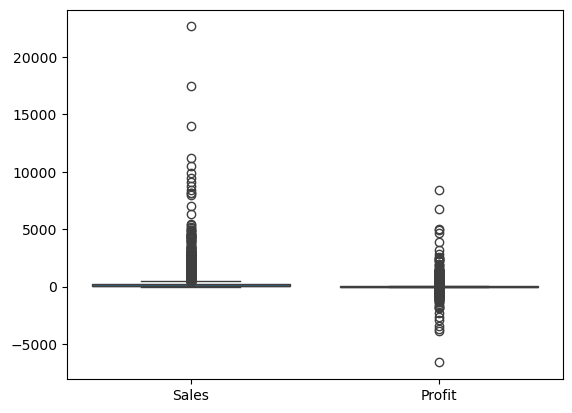

In [25]:
sns.boxplot(data=df[['Sales','Profit']])
plt.show()

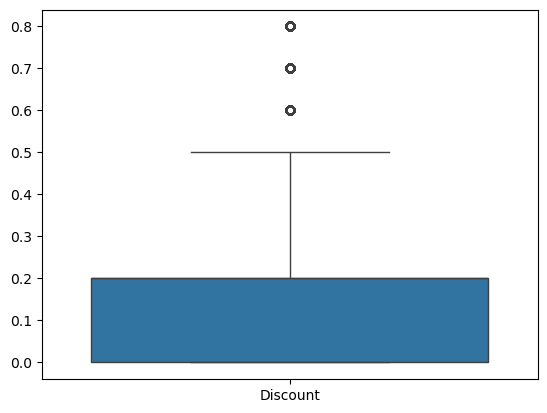

In [24]:
sns.boxplot(data=df[['Discount']])
plt.show()

Ada beberapa data yang outlier dengan harga yang tinggi sekali, profit yang minus besar. Tapi data dianggap bisa menjadi informasi untuk penentuan harga atau diskon yang cukup agresif sehingga berpengaruh ke profit. karena tidak ada informasi pasti terkait dengan jenis profit dan cost sehingga seluruh data diasumsikan oke

# PERFORMA COMPANY

In [19]:
#REVENUE SETIAP TAHUN

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [20]:
#TOTAL PENJUALAN & PROFIT
summary_year = df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()
summary_year.columns = ['Year', 'Total_Sales', 'Total_Profit']
summary_year.head(5)

,Year,Total_Sales,Total_Profit
0,2020,484247.4981,49543.9741
1,2021,470532.5090,61618.6037
2,2022,608473.8300,81726.9308
3,2023,733947.0232,93507.5131


In [31]:
summary_year['Profit_Percentage'] = (summary_year['Total_Profit'] / summary_year['Total_Sales']) * 100
print(summary_year)

   Year  Total_Sales  Total_Profit  Profit_Percentage
0  2020  484247.4981    49543.9741          10.231126
1  2021  470532.5090    61618.6037          13.095504
2  2022  608473.8300    81726.9308          13.431462
3  2023  733947.0232    93507.5131          12.740363


In [22]:
summary_month = df.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()
summary_month.columns = ['Year', 'Month', 'Monthly_Sales', 'Monthly_Profit']
summary_month.head(20)

,Year,Month,Monthly_Sales,Monthly_Profit
0,2020,1,13946.2290,2446.7711
1,2020,2,4810.5580,865.7280
2,2020,3,55691.0090,498.7299
3,2020,4,28295.3450,3488.8352
4,2020,5,23648.2870,2738.7096
5,2020,6,34595.1276,4976.5244
6,2020,7,33946.3930,-841.4826
7,2020,8,27909.4685,5318.1050
8,2020,9,81777.3508,8328.0994
9,2020,10,31453.3930,3448.2573


Problem = Revenue Besar tapi Profit kecil, profit 10 % pertahun cukup kecil untuk perusahaan teknologi, karna tidak ada nilai dan penjelasan terkait cost kita asumsikan ini adalah perubahan yang masih dalam proses pertumbuhan, sehingga kebijakan untuk diskon yang cukup agresif. 

# MAPPING NEGARA DAN INDUSTRI

- Negara yang penetrasi marketnya oke dari tahun ke tahun?
Berarti negara yang dari revenue, profit dan retensionnya oke
- Negara yang potensial untuk dikembangkan?
Insight: mendukung perluasan pasar
-Industri dengan yang paling mendatangkan revenue dan profit



In [34]:
# Hitung total sales, profit, quantity per country + industri dominan
dominant_industry = df.groupby(['Country', 'Industry'])['Sales'].sum().reset_index()
dominant_industry = dominant_industry.sort_values(['Country', 'Sales'], ascending=[True, False])
dominant_industry = dominant_industry.drop_duplicates('Country', keep='first')

# Agregasi total sales dan profit
sales_summary = df.groupby('Country').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Gabungkan dengan data industri dominan
sales_summary = sales_summary.merge(dominant_industry[['Country', 'Industry']], on='Country', how='left')

# Buat choropleth map
fig = px.choropleth(
    sales_summary,
    locations='Country',
    locationmode='country names',
    color='Sales',
    hover_name='Country',
    hover_data={
        'Sales': ':.2f',
        'Profit': ':.2f',
        'Quantity': True,
        'Industry': True  # Munculin industri dominan
    },
    color_continuous_scale='Viridis',
    title='📍 Global SaaS Sales by Country & Industry'
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showframe=False)
fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    font=dict(size=12),
    coloraxis_colorbar=dict(title="Total Sales", tickprefix="$")
)
fig.show()

In [57]:

# Hitung total Sales dan Profit per Year + Country + Industry
grouped = df.groupby(['Year', 'Country', 'Industry']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

top_country_industry_sales = grouped.sort_values(['Profit', 'Sales'], ascending=[False,True])
top_per_year = top_country_industry_sales.groupby('Year').head(8)

consistency_check = top_per_year.groupby(['Country', 'Industry'])['Year'].nunique().reset_index()
consistency_check.columns = ['Country', 'Industry', 'Freq_in_Top']
consistency_check = consistency_check.sort_values('Freq_in_Top', ascending=False)

# Tampilkan
print("Top performer konsisten dari segi sales:")
print(top_per_year)

Top performer konsisten dari segi sales:
      Year         Country           Industry       Sales     Profit
1070  2023  United Kingdom            Finance  34710.1340  8926.9850
614   2022           India  Consumer Products  18464.6900  8784.1406
817   2023          Canada  Consumer Products  15902.9900  7033.0589
766   2022  United Kingdom            Finance  23306.6220  6070.3303
542   2022          Brazil             Energy  11716.7340  5453.7853
1081  2023   United States         Healthcare  22314.1600  5135.6646
974   2023     Philippines             Retail  10499.9700  5039.9856
128   2020      Luxembourg         Healthcare  10813.8600  4786.6017
1080  2023   United States            Finance  27194.1055  4743.2309
237   2020  United Kingdom             Energy  19837.9520  4552.5268
736   2022           Spain      Manufacturing  12926.9000  4403.3484
1079  2023   United States             Energy  20107.9080  4294.9161
1078  2023   United States  Consumer Products  18315.8130  420

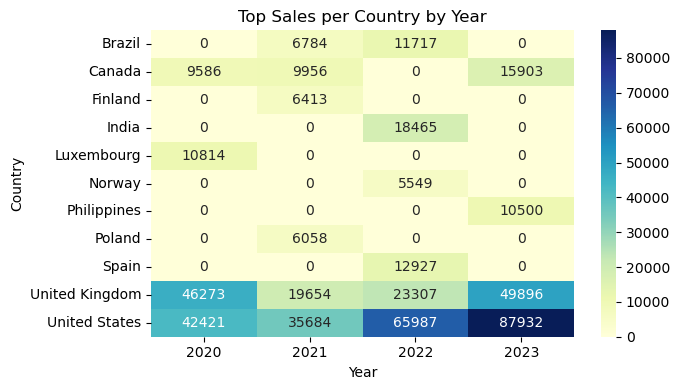

In [103]:
pivot = top_per_year.pivot_table(
    index='Country', columns='Year', values='Sales', aggfunc='sum', fill_value=0
)

plt.figure(figsize=(7, 4))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Top Sales per Country by Year')
plt.ylabel('Country')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

INDUSTRY

In [ ]:
industry_summary = df.groupby('Industry').agg(
    Total_Orders=('Customer ID', 'count'),
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Profit_Per_Order=('Profit', lambda x: x.sum() / x.count()),
    Negative_Profit_Count=('Profit', lambda x: (x < 0).sum()),
    Total_Quantity=('Quantity', 'sum'),  # << NEW
).reset_index()

industry_summary['% Negative Profit'] = (
    industry_summary['Negative_Profit_Count'] / industry_summary['Total_Orders']
) * 100

industry_summary['Profit_Margin'] = (
    industry_summary['Total_Profit'] / industry_summary['Total_Sales']
) * 100

# Urutkan berdasarkan total profit
industry_summary = industry_summary.sort_values(by='Total_Profit', ascending=False)

industry_summary.head(20)

,Industry,Total_Orders,Total_Sales,Total_Profit,Avg_Profit_Per_Order,Negative_Profit_Count,Total_Quantity,% Negative Profit,Profit_Margin
3,Finance,2127,474150.4844,50348.9696,23.671354,390,8007,18.335684,10.618774
2,Energy,1316,304644.1409,45282.3137,34.409053,247,4920,18.768997,14.864003
5,Manufacturing,1222,295192.3812,38413.1064,31.434621,231,4586,18.903437,13.012906
1,Consumer Products,1021,224044.1422,37018.0077,36.256619,217,3870,21.253673,16.522640
4,Healthcare,1049,273183.2882,31969.0932,30.475780,195,4022,18.589133,11.702434
7,Retail,972,223072.0720,30207.8208,31.078005,160,3693,16.460905,13.541731
8,Tech,1236,263169.0277,24615.0436,19.915084,225,4816,18.203883,9.353321
0,Communications,593,120962.2365,13976.3410,23.568872,124,2169,20.910624,11.554301
9,Transportation,351,90191.3276,7402.6967,21.090304,65,1377,18.518519,8.207770
6,Misc,107,28591.7596,7163.6290,66.949804,17,413,15.887850,25.054873


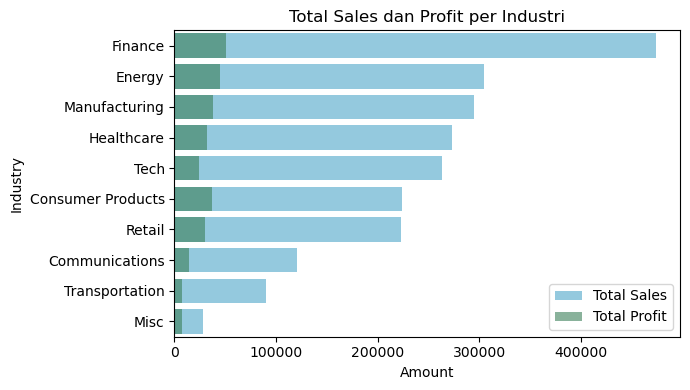

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x='Total_Sales', y='Industry', data=industry_summary.sort_values('Total_Sales', ascending=False), color='skyblue', label='Total Sales')
sns.barplot(x='Total_Profit', y='Industry', data=industry_summary.sort_values('Total_Sales', ascending=False), color='seagreen', alpha=0.6, label='Total Profit')

plt.title('Total Sales dan Profit per Industri')
plt.xlabel('Amount')
plt.ylabel('Industry')
plt.legend()
plt.tight_layout()
plt.show()

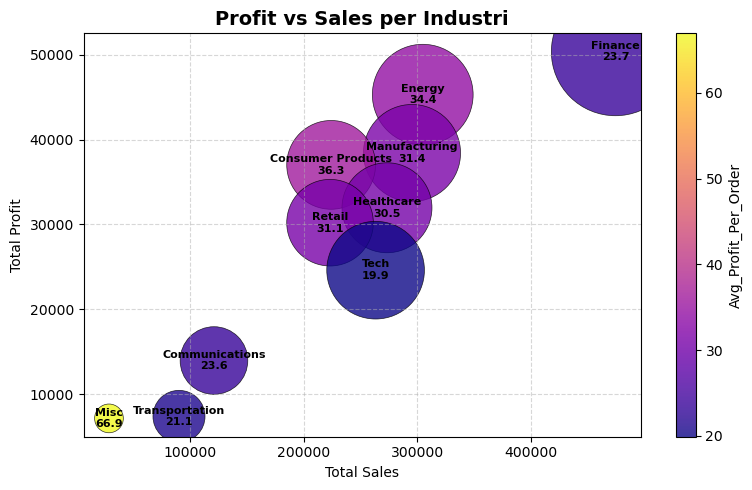

In [105]:
plt.figure(figsize=(8, 5))

scatter = plt.scatter(
    industry_summary['Total_Sales'],
    industry_summary['Total_Profit'],
    s=industry_summary['Total_Orders'] * 4,
    c=industry_summary['Avg_Profit_Per_Order'],
    cmap='plasma',  # Lebih vibrant
    alpha=0.8,
    edgecolors='black',
    linewidths=0.5
)

for i in range(industry_summary.shape[0]):
    plt.text(
        industry_summary['Total_Sales'][i],
        industry_summary['Total_Profit'][i],
        f"{industry_summary['Industry'][i]}\n{industry_summary['Avg_Profit_Per_Order'][i]:.1f}",  # dua baris: nama + angka
        fontsize=8,
        ha='center',
        va='center',
        color='Black',
        weight='bold'
    )


plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.title('Profit vs Sales per Industri', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Avg_Profit_Per_Order')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# UJI STATISTIK

Uji Statistik untuk melihat hubungan dan Estimasi bersar pengaruh antar keduanya.
Hasil uji ini mendukung argumen kalau memang nanti bisa suggest untuk manage diskon. 


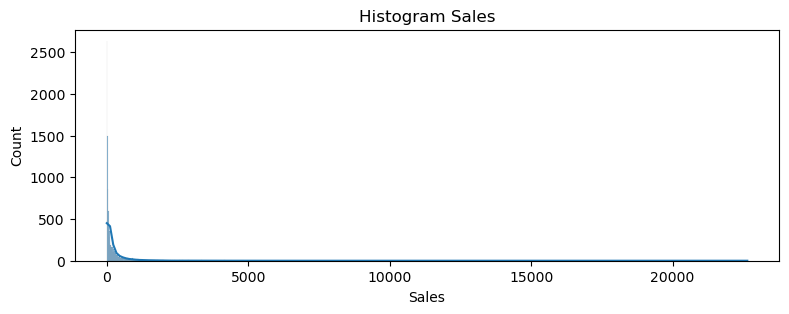

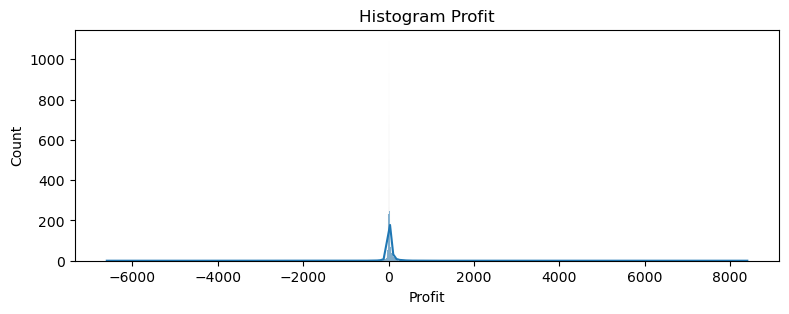

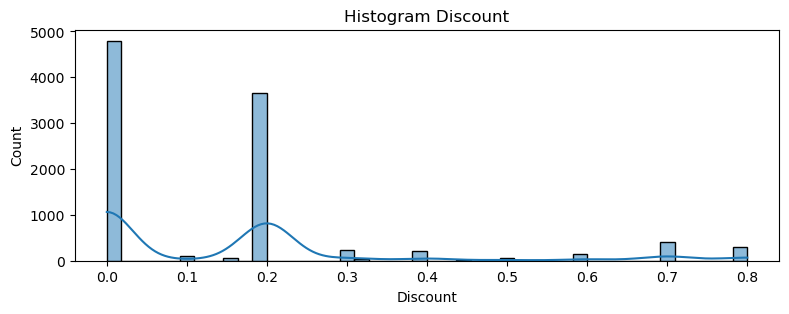

In [69]:
#Data normal atau engga
import scipy.stats as stats

for col in ['Sales', 'Profit', 'Discount']:
    plt.figure(figsize=(20, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram {col}')

    plt.show()

Distribusi ga Normal, jadi kita uji korelasi pake Spearman

🔗 Korelasi Spearman:
              Sales    Profit  Discount
Sales     1.000000  0.518407 -0.056969
Profit    0.518407  1.000000 -0.543350
Discount -0.056969 -0.543350  1.000000


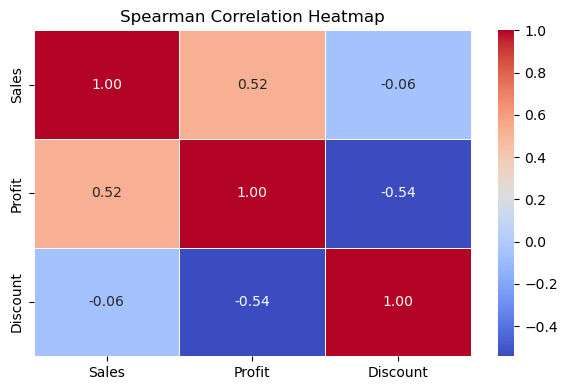

In [70]:
# Korelasi Spearman
corr_spearman = df[['Sales', 'Profit', 'Discount']].corr(method='spearman')
print("🔗 Korelasi Spearman:\n", corr_spearman)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()


In [71]:
from scipy.stats import spearmanr

pairs = [('Sales', 'Profit'), ('Sales', 'Discount'), ('Profit', 'Discount')]

for x, y in pairs:
    rho, p = spearmanr(df[x], df[y])
    r_squared = rho ** 2 * 100

    print(f'\n🔍 Korelasi Spearman antara {x} dan {y}:')
    print(f'  Koefisien       = {rho:.4f}')
    print(f'  R² estimasi     = {r_squared:.2f}%')
    print(f'  p-value         = {p:.4f}')
    
    if p < 0.05:
        print('  ✅ Signifikan secara statistik (p < 0.05)')
    else:
        print('  ❌ Tidak signifikan secara statistik (p ≥ 0.05)')



🔍 Korelasi Spearman antara Sales dan Profit:
  Koefisien       = 0.5184
  R² estimasi     = 26.87%
  p-value         = 0.0000
  ✅ Signifikan secara statistik (p < 0.05)

🔍 Korelasi Spearman antara Sales dan Discount:
  Koefisien       = -0.0570
  R² estimasi     = 0.32%
  p-value         = 0.0000
  ✅ Signifikan secara statistik (p < 0.05)

🔍 Korelasi Spearman antara Profit dan Discount:
  Koefisien       = -0.5434
  R² estimasi     = 29.52%
  p-value         = 0.0000
  ✅ Signifikan secara statistik (p < 0.05)


- Sales x Profit punya korelasi cukup kuat, korelasi positif = semakin tinggi penjualan akan ada potensi semakin tinggi juga profitnya. 
- Sales diskon berkorelasi tapi ga kuat.
- Profit dan diskon punya korelasi yang cukup kuat juga, korelasi negtif = jadi semakin tinggi diskonnya akan ada potensi profit yang jadi lebih kecil. 

# PRODUCT

In [72]:
produk_terjual = df.groupby('Product')[['Quantity','Sales','Profit']].sum().sort_values(by='Quantity',ascending=False)
print(produk_terjual)

                            Quantity        Sales      Profit
Product                                                      
ContactMatcher                  7215  410378.2650  12496.2822
Support                         5825  125152.7440  32864.4698
FinanceHub                      3756  340935.4150  32136.4203
SaaS Connector Pack             3563   91705.1640  13059.1436
Site Analytics                  3289  330007.0540  44515.7306
Marketing Suite - Gold          3158  223843.6080  21278.8264
ChatBot Plugin                  3000   27118.7920   6527.7870
Data Smasher                    2976  167380.3180  41936.6357
OneView                         1729  107532.1610  18138.0054
Storage                          914    3024.2800    949.5182
SaaS Connector Pack - Gold       906   16476.4020   6964.1767
Marketing Suite                  868  114879.9963  -3472.5560
Big Ol Database                  440  189238.6310   3384.7569
Alchemy                          234  149528.0300  55617.8249


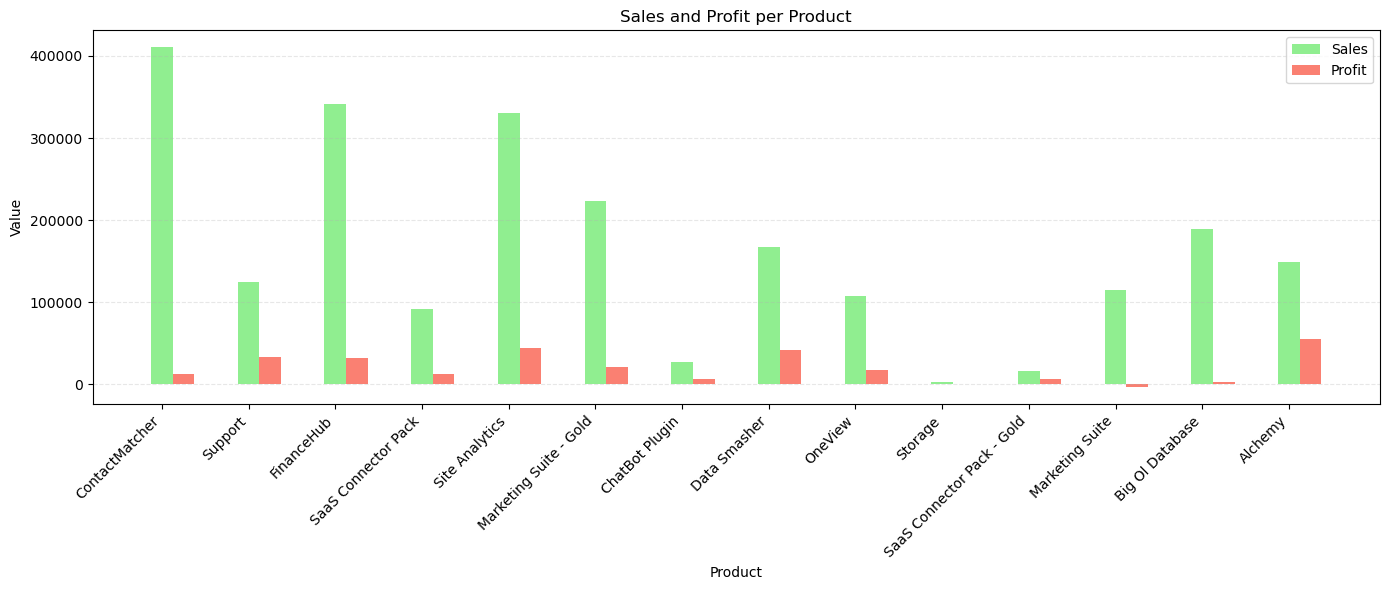

In [155]:
produk = produk_terjual.index.tolist()
sales = produk_terjual['Sales'].values
profit = produk_terjual['Profit'].values

# Set posisi bar
x = np.arange(len(produk))
width = 0.25  # lebar bar

# Buat figure
plt.figure(figsize=(14, 6))

# Tambahkan masing-masing bar
plt.bar(x, sales, width, label='Sales', color='lightgreen')
plt.bar(x + width, profit, width, label='Profit', color='salmon')

# Label dan judul
plt.xlabel('Product')
plt.ylabel('Value')
plt.title('Sales and Profit per Product')
plt.xticks(x, produk, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Tampilkan
plt.show()


In [ ]:
# Cek diskon yang tinggi di produk dan secara penjualan banyak
high_discount = df[df['Discount'] > 0.5]
high_discount[['Product', 'Sales', 'Profit']].groupby('Product').agg(['count', 'mean', 'sum']).sort_values(('Profit', 'sum'))


Sales                        Profit              \
                    count        mean        sum  count        mean   
Product                                                               
ContactMatcher        613   58.956954  36140.613    613  -62.822996   
Big Ol Database        23  678.326478  15601.509     23 -851.274743   
OneView                67   50.485582   3382.534     67 -128.800615   
SaaS Connector Pack   138   48.150000   6644.700    138  -43.077212   
Marketing Suite        15  163.958800   2459.382     15 -259.662627   

                                 
                            sum  
Product                          
ContactMatcher      -38510.4964  
Big Ol Database     -19579.3191  
OneView              -8629.6412  
SaaS Connector Pack  -5944.6552  
Marketing Suite      -3894.9394

Product ContactMatcher : punya penjualan tertinggi, tapi banyak ngasih dikon diatas 50%, jadi profitnya secara total kecil, dan dari frekuensi menunjukkan pemberian diskon yang cukup agresif. asumsinya bisa jadi bakar duit di marketing untuk peluncuran produk. tapi dengan banyaknya penjualan, bisa juga disimpulkan bahwa product ini juga merupakan produk market fit.o

In [ ]:
# Buat Misahin jumlah transaksi yang profitnya positif dan minus
df['Profit_Status'] = df['Profit'].apply(lambda x: 'Positif' if x >= 0 else 'Negatif')

#Jumlah order
jumlah_profit = df.groupby(['Product', 'Profit_Status']).size().unstack(fill_value=0)

# Total profit (nilai) per produk berdasarkan status
total_profit = df.groupby(['Product', 'Profit_Status'])['Profit'].sum().unstack(fill_value=0)

Product_x_Profit = jumlah_profit.join(total_profit, lsuffix='_count', rsuffix='_sum')

Product_x_Profit = Product_x_Profit.sort_values(by='Positif_sum', ascending=False)

print(Product_x_Profit.head(10))

Profit_Status           Negatif_count  Positif_count  Negatif_sum  Positif_sum
Product                                                                       
ContactMatcher                    816           1026  -70922.6447   83418.9269
Alchemy                             0             68       0.0000   55617.8249
Site Analytics                    136            753   -7530.6235   52046.3541
Data Smasher                       91            684    -930.6265   42867.2622
FinanceHub                        235            746   -9880.8413   42017.2616
Support                            33           1527   -3015.6219   35880.0917
Big Ol Database                    44             71  -30118.6682   33503.4251
Marketing Suite - Gold            161            685   -6426.3038   27705.1302
OneView                            67            399   -8629.6412   26767.6466
SaaS Connector Pack               167            790   -6490.9134   19550.0570


    
* COBA KITA HITUNG ESTIMASI PROFIT MARGIN UNTUK LIAT PRODUK YANG KUALITASNYA OKE

In [76]:
#Profit Margin
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Discount Ratio
df['Discount_Value'] = df['Sales'] * df['Discount']
df['Discount_Ratio'] = df['Discount_Value'] / df['Sales']

# Profit per Unit: untung per 1 unit produk
df['Profit_per_Unit'] = df['Profit'] / df['Quantity']

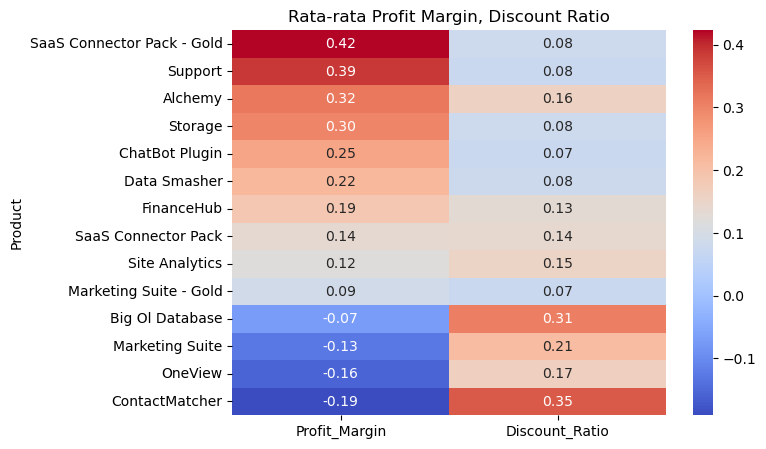

In [77]:
ratio_notes = df.groupby('Product')[['Profit_Margin', 'Discount_Ratio']].mean().sort_values('Profit_Margin', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(ratio_notes, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Rata-rata Profit Margin, Discount Ratio')
plt.show()

* MAPPING PRODUK DAN QUANTITY

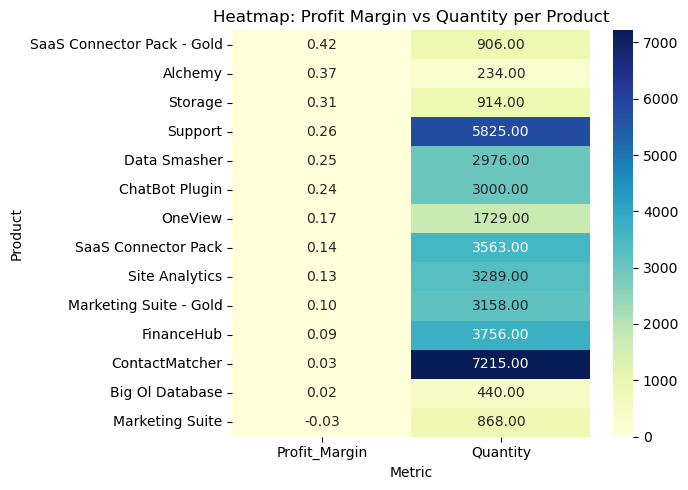

In [78]:
#Headmapnya
summary = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
})

# Hitung ulang profit margin
summary['Profit_Margin'] = summary['Profit'] / summary['Sales']

# Pilih kolom yang mau dimasukkan ke heatmap
heatmap_data = summary[['Profit_Margin', 'Quantity']].sort_values(by='Profit_Margin', ascending=False)

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap: Profit Margin vs Quantity per Product')
plt.xlabel('Metric')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


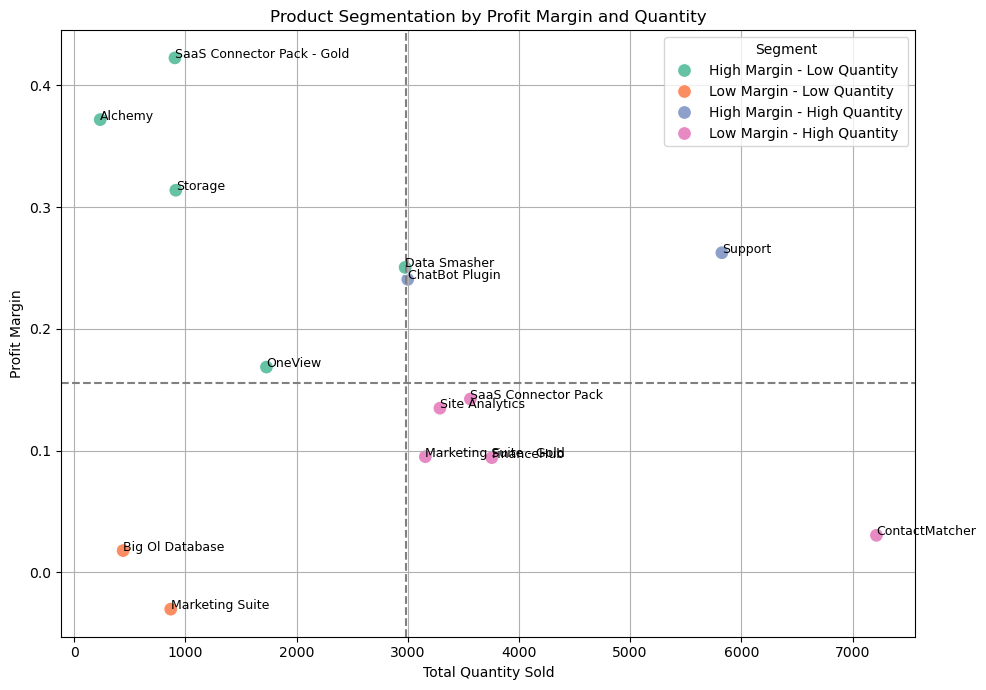

In [79]:

df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# 3. Hitung total Sales, Profit, dan Quantity per Product
product_summary = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# 4. Hitung Profit Margin
product_summary['Profit_Margin'] = product_summary['Profit'] / product_summary['Sales']

# 5. Hitung median Profit Margin dan Quantity
median_margin = product_summary['Profit_Margin'].median()
median_quantity = product_summary['Quantity'].median()

# 6. Segmentasi produk berdasarkan kuadran
def classify(row):
    if row['Profit_Margin'] >= median_margin and row['Quantity'] >= median_quantity:
        return 'High Margin - High Quantity'
    elif row['Profit_Margin'] >= median_margin and row['Quantity'] < median_quantity:
        return 'High Margin - Low Quantity'
    elif row['Profit_Margin'] < median_margin and row['Quantity'] >= median_quantity:
        return 'Low Margin - High Quantity'
    else:
        return 'Low Margin - Low Quantity'

product_summary['Segment'] = product_summary.apply(classify, axis=1)

# 7. Visualisasi scatter plot dengan nama produk
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=product_summary,
    x='Quantity',
    y='Profit_Margin',
    hue='Segment',
    palette='Set2',
    s=100
)

# Tambahkan nama produk ke tiap titik
for _, row in product_summary.iterrows():
    plt.text(
        row['Quantity'] + 1,  # offset agar label tidak menutupi titik
        row['Profit_Margin'],
        row['Product'],
        fontsize=9
    )

# Tambahkan garis pembagi kuadran
plt.axhline(median_margin, color='grey', linestyle='--')
plt.axvline(median_quantity, color='grey', linestyle='--')

plt.title('Product Segmentation by Profit Margin and Quantity', fontsize=12)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Profit Margin')
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()


# PRICING dari segi PRODUCT

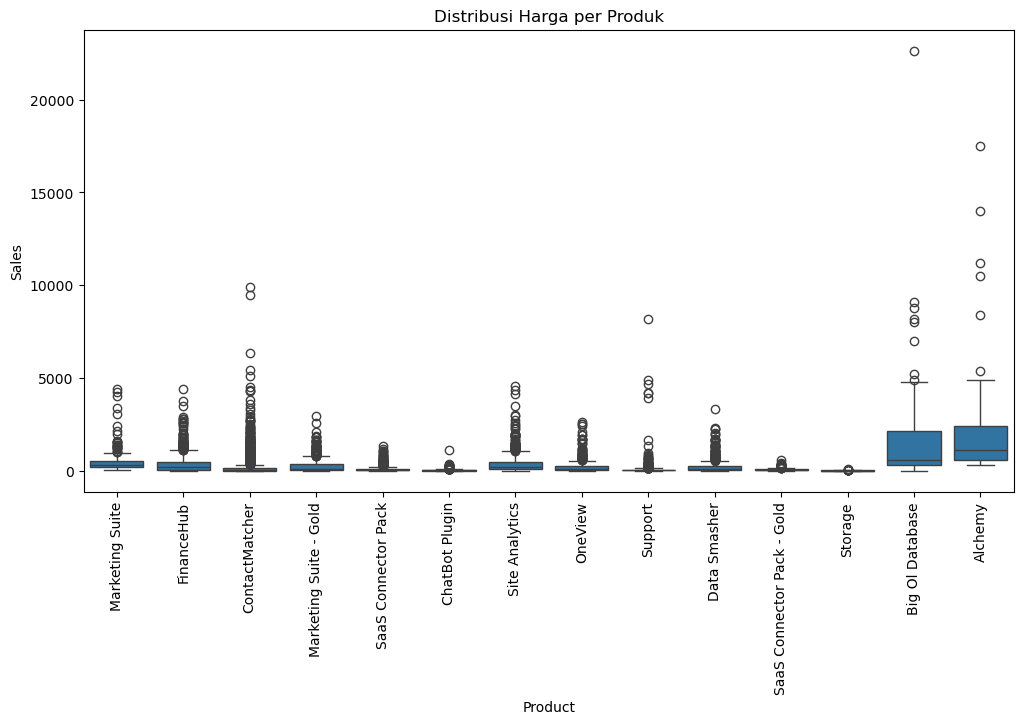

In [80]:
#Liat distribusinya 
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product', y='Sales')
plt.xticks(rotation=90)
plt.title('Distribusi Harga per Produk')
plt.show()

Memang Alchemy secara profit gapernah minus, meskipun penjaualan sedikit tapi termasuk penyumbang profit tertinggi. kalau dari distribusinya emang alchemy yang secara penjualan ngasih harga tinggi.

In [ ]:
#Mau hitung Pake profit margin, jadi kita coba liat dulu dari sisi korelasi nya
from scipy.stats import spearmanr

pairs = [('Discount', 'Profit_Margin')]

for x, y in pairs:
    rho, p = spearmanr(df[x], df[y])
    r_squared = rho ** 2 * 100

    print(f'\n Korelasi Spearman antara {x} dan {y}:')
    print(f'  Koefisien       = {rho:.4f}')
    print(f'  R² estimasi     = {r_squared:.2f}%')
    print(f'  p-value         = {p:.4f}')
    
    if p < 0.05:
        print('ignifikan secara statistik (p < 0.05)')
    else:
        print('Tidak signifikan secara statistik (p ≥ 0.05)')



🔍 Korelasi Spearman antara Discount dan Profit_Margin:
  Koefisien       = -0.6451
  R² estimasi     = 41.62%
  p-value         = 0.0000
ignifikan secara statistik (p < 0.05)


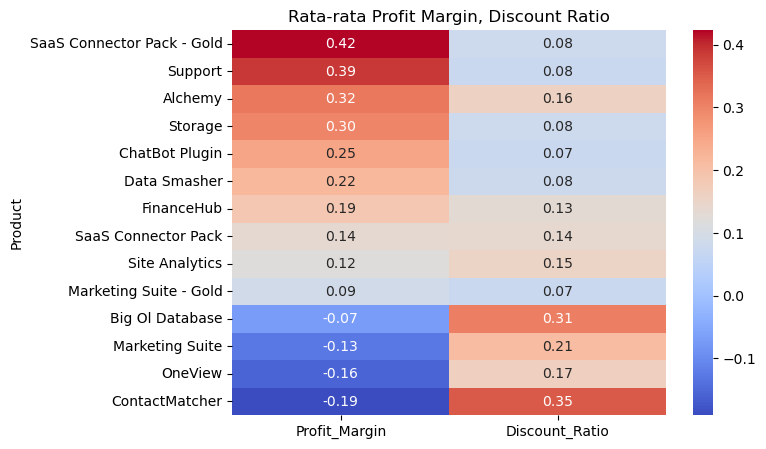

In [84]:
ratio_notes = df.groupby('Product')[['Profit_Margin', 'Discount_Ratio']].mean().sort_values('Profit_Margin', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(ratio_notes, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Rata-rata Profit Margin, Discount Ratio')
plt.show()

Secara profit margin, yang di pengaruhi karena adanya diskon hingga profit marginya minus itu Big Ol Database sama Contact Matcher. 

Insight: Perlu manage harga khususnya untuk contactmathcer, karna sudah cukup baik penetrasinya sehingga penjualannya perlu dipertimbangkan lagi besaran diskon yang diberikan.

In [137]:
#Segementasi produk berdasarkan profit
summary_behavior = df.groupby(['Product']).agg({
    'Discount': 'mean',
    'Quantity': 'mean',
    'Profit': 'sum',
    'Sales': 'sum'
}).reset_index()

summary_behavior['Profit_Margin'] = summary_behavior['Profit'] / summary_behavior['Sales']
summary_behavior = summary_behavior.dropna(subset=['Profit_Margin'])  # hilangkan div/0

#Mapping
def classify(row):
    if row['Profit_Margin'] >= summary_behavior['Profit_Margin'].mean() and row['Discount'] < summary_behavior['Discount'].mean():
        return 'Premium Product'
    elif row['Profit_Margin'] < summary_behavior['Profit_Margin'].mean() and row['Discount'] >= summary_behavior['Discount'].mean():
        return 'Discount Sensitive'
    elif row['Profit_Margin'] < summary_behavior['Profit_Margin'].mean() and row['Discount'] < summary_behavior['Discount'].mean():
        return 'Low Value Product'
    else:
        return 'Stable Performer'

summary_behavior['Segment'] = summary_behavior.apply(classify, axis=1)

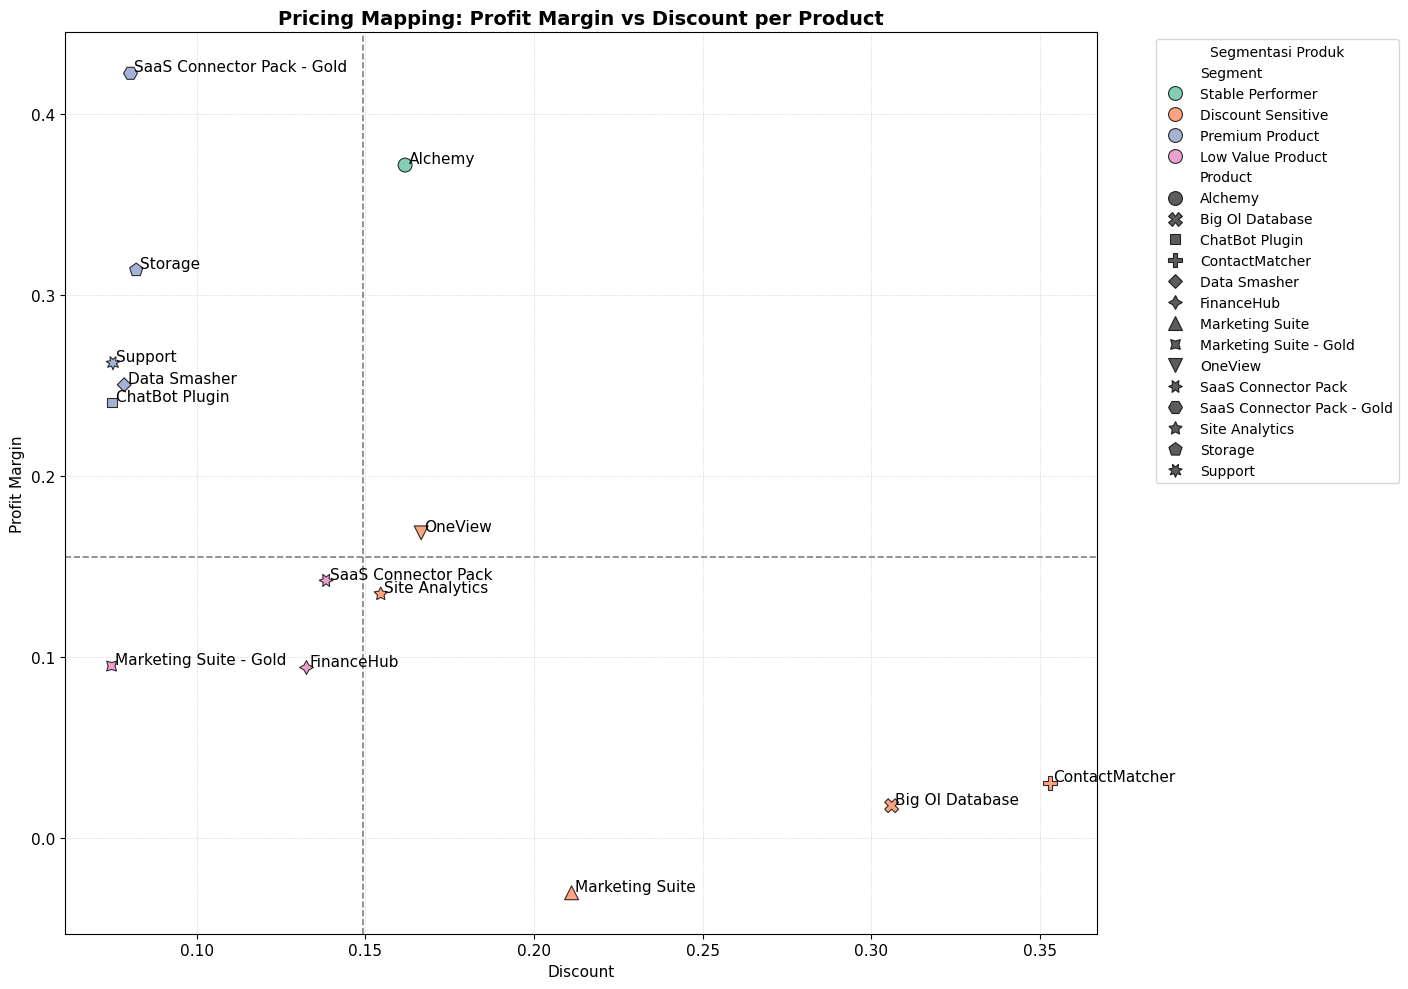

In [146]:

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=summary_behavior,
    x='Discount',
    y='Profit_Margin',
    hue='Segment',
    style='Product',
    palette='Set2',
    s=100,
    edgecolor='black',
    alpha=0.8
)

#Label Produk
for i in range(summary_behavior.shape[0]):
    plt.text(
        x=summary_behavior['Discount'].iloc[i] + 0.001,
        y=summary_behavior['Profit_Margin'].iloc[i] + 0.001,
        s=summary_behavior['Product'].iloc[i],
        fontsize=11,
        alpha=1
    )

# Garis Kuadran
x_avg = summary_behavior['Discount'].mean()
y_avg = summary_behavior['Profit_Margin'].median()

plt.axvline(x=x_avg, color='gray', linestyle='--', linewidth=1.2)
plt.axhline(y=y_avg, color='gray', linestyle='--', linewidth=1.2)

# Styling & Judul
plt.title('Pricing Mapping: Profit Margin vs Discount per Product', fontsize=14, weight='bold')
plt.xlabel('Discount', fontsize=11)
plt.ylabel('Profit Margin', fontsize=11)
plt.grid(True, linestyle=':', linewidth=0.6, alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.legend(title='Segmentasi Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
summary_behavior = df.groupby(['Industry']).agg({
    'Discount': 'mean',
    'Quantity': 'mean',
    'Profit': 'sum',
    'Sales': 'sum'
}).reset_index()

summary_behavior['Profit_Margin'] = summary_behavior['Profit'] / summary_behavior['Sales']
summary_behavior = summary_behavior.dropna(subset=['Profit_Margin'])  # hilangkan div/0

#Mapping
def classify(row):
    if row['Profit_Margin'] >= summary_behavior['Profit_Margin'].mean() and row['Discount'] < summary_behavior['Discount'].mean():
        return 'Premium Product'
    elif row['Profit_Margin'] < summary_behavior['Profit_Margin'].mean() and row['Discount'] >= summary_behavior['Discount'].mean():
        return 'Discount Sensitive'
    elif row['Profit_Margin'] < summary_behavior['Profit_Margin'].mean() and row['Discount'] < summary_behavior['Discount'].mean():
        return 'Low Value Product'
    else:
        return 'Stable Performer'

summary_behavior['Segment'] = summary_behavior.apply(classify, axis=1)

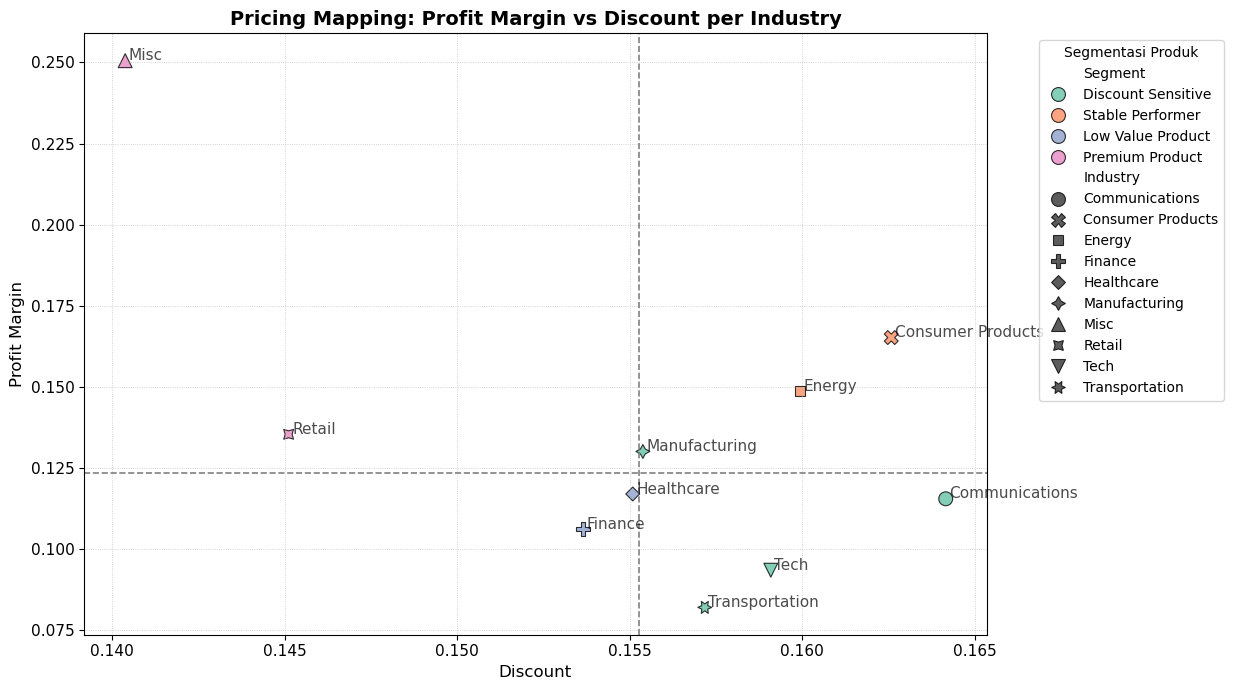

In [151]:

plt.figure (figsize=(11,7))
sns.scatterplot(
    data=summary_behavior,
    x='Discount',
    y='Profit_Margin',
    hue='Segment',
    style='Industry',
    palette='Set2',
    s=100,
    edgecolor='black',
    alpha=0.8
)

#Label Produk
for i in range(summary_behavior.shape[0]):
    plt.text(
        x=summary_behavior['Discount'].iloc[i] + 0.0001,
        y=summary_behavior['Profit_Margin'].iloc[i] + 0.0001,
        s=summary_behavior['Industry'].iloc[i],
        fontsize=11,
        alpha=0.7
    )

# Garis Kuadran
x_avg = summary_behavior['Discount'].mean()
y_avg = summary_behavior['Profit_Margin'].median()

plt.axvline(x=x_avg, color='gray', linestyle='--', linewidth=1.2)
plt.axhline(y=y_avg, color='gray', linestyle='--', linewidth=1.2)

# Styling & Judul
plt.title('Pricing Mapping: Profit Margin vs Discount per Industry', fontsize=14, weight='bold')
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.6, alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.legend(title='Segmentasi Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
summary_behavior = df.groupby(['Industry']).agg({
    'Discount': 'mean',
    'Quantity': 'mean',
    'Profit': 'sum',
    'Sales': 'sum'
}).reset_index()

summary_behavior['Profit_Margin'] = summary_behavior['Profit'] / summary_behavior['Sales']
summary_behavior = summary_behavior.dropna(subset=['Profit_Margin'])  # hilangkan div/0

#Mapping
def classify(row):
    if row['Profit_Margin'] >= summary_behavior['Profit_Margin'].mean() and row['Discount'] < summary_behavior['Discount'].mean():
        return 'Premium Product'
    elif row['Profit_Margin'] < summary_behavior['Profit_Margin'].mean() and row['Discount'] >= summary_behavior['Discount'].mean():
        return 'Discount Sensitive'
    elif row['Profit_Margin'] < summary_behavior['Profit_Margin'].mean() and row['Discount'] < summary_behavior['Discount'].mean():
        return 'Low Value Product'
    else:
        return 'Stable Performer'

summary_behavior['Segment'] = summary_behavior.apply(classify, axis=1)

In [102]:
# Kolom yang relevan
keep_cols = ['Customer ID','Country','Order Date', 'Product', 'Industry','License', 'Sales', 'Profit', 'Quantity', 'Discount','Profit_Margin']

# Drop sisanya
df_export = df[keep_cols].copy()

# Save ke CSV
df_export.to_excel('/Users/elfirapipitkurniawati/Library/CloudStorage/GoogleDrive-elfirapipitkurniawati@gmail.com/My Drive/PROJECT PURWADIKA/CAPSTONE PROJECT 3-ELFIRA-JCBDAOL 002/lookers_data_clean.xlsx', index=False)
